# Log-Optimal Portfolios

This notebook demonstrates the Kelly criterion and other phenomena associated with log-optimal growth.

* https://www.princeton.edu/~wbialek/rome/refs/kelly_56.pdf
* https://web.archive.org/web/20091007195426/http://www.edwardothorp.com/sitebuildercontent/sitebuilderfiles/beatthemarket.pdf
* https://en.wikipedia.org/wiki/Kelly_criterion

## Initializations

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Kelly's Criterion

In a nutshell, Kelly's criterion is to choose strategies that maximize expected log return.

$$\max E[\ln R]$$

where $R$ is total return. As we learned, Kelly's criterion has properties useful in the context of long-term investments.

## Example 1. Maximizing Return for a Game with Arbitrary Odds

Consider a game with two outcomes. For each \\$1 wagered, a successful outcome with probability $p$ returns $b+1$ dollars. An unsuccessful outcome returns nothing. What fraction $w$ of our portfolio should we wager on each turn of the game?

![Kelly_Criterion_Fig2](https://github.com/jckantor/CBE40455/blob/master/notebooks/figures/Kelly_Criterion_Fig2.png?raw=true)

There are two outcomes with returns

$$
\begin{align}
R_1 & = w(b+1) + 1 - w = 1+wb && \mbox{with probability }p\\
R_2 & = 1-w && \mbox{with probability }1-p
\end{align}
$$

The expected log return becomes

$$
\begin{align}
E[\ln R] & = p \ln R_1 + (1-p) \ln R_2 \\
& = p\ln(1+ wb) + (1-p)\ln(1-w)
\end{align}
$$

Text(0.5, 1.0, 'Expected log return versus wager')

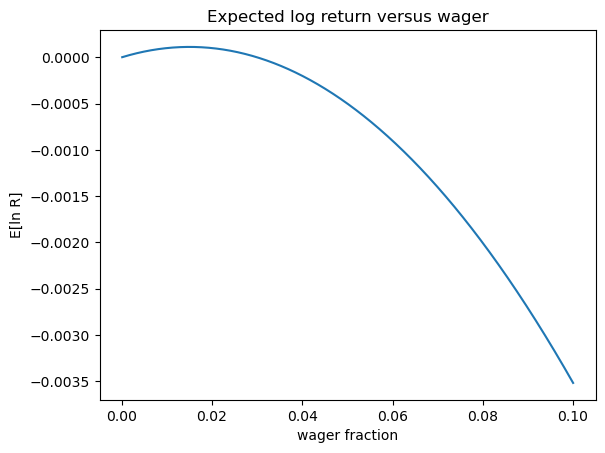

In [16]:
p = 0.5075
b = 1

w = np.linspace(0.0001, 0.1, 1000)
plt.plot(w, p*np.log(1 + w*b) + (1 - p)*np.log(1 - w))
plt.xlabel("wager fraction")
plt.ylabel("E[ln R]")
plt.title("Expected log return versus wager")

Applying Kelly's criterion, we seek a value for $w$ that maximizes $E[\ln R]$. Taking derivatives

$$
\begin{align}
\frac{\partial E[\ln R]}{\partial w} = \frac{pb}{1+w_{opt}b} - \frac{1-p}{1-w_{opt}} & = 0\\
\end{align}
$$

Solving for $w$

$$w_{opt} = \frac{p(b+1)-1}{b}$$

The growth rate is then the value of $E[\ln R]$ when $w = w_{opt}$, i.e., 

$$m = p\ln(1+ w_{opt}b) + (1-p)\ln(1-w_{opt})$$

You can test how well this works in the following cell.  Fix $p$ and $b$, and let the code do a Monte Carlo simulation to show how well Kelly's criterion works.

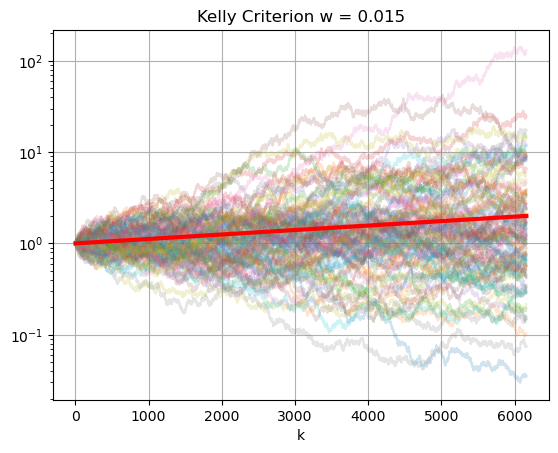

In [3]:
import numpy as np

from numpy.random import uniform

p = 0.5075
b = 1

# Kelly criterion
w = (p*(b + 1) - 1)/b

# optimal growth rate
m = p*np.log(1 + w*b) + (1-p)*np.log(1 - w)

# number of plays to double wealth
K = int(np.log(2)/m)

# monte carlo simulation and plotting
for n in range(0, 100):
    W = [1]
    for k in range(0,K):
        if uniform() <= p:
            W.append(W[-1]*(1 + w*b))
        else:
            W.append(W[-1]*(1 - w))
    plt.semilogy(W, alpha=0.2)
plt.semilogy(np.linspace(0,K), np.exp(m*np.linspace(0,K)), 'r', lw=3)
plt.title(f'Kelly Criterion w = {w:0.3f}')
plt.xlabel('k')
plt.grid()

## Example 2. Multiple Outcomes

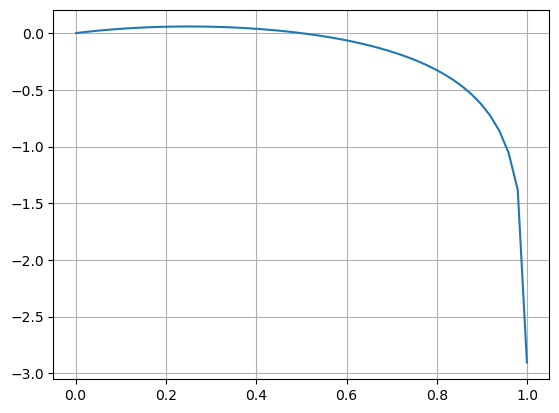

In [18]:
import numpy as np
import matplotlib.pyplot as plt

w1 = np.linspace(0.001, 0.999)
w2 = 0
w3 = 0

p1 = 1/2
p2 = 1/3
p3 = 1/6

R1 = 1 + 2*w1 - w2 - w3
R2 = 1 - w1 + w2 - w3
R3 = 1 - w1 - w2 + 5*w3

m = p1*np.log(R1) + p2*np.log(R2) + p3*np.log(R3)

plt.plot(w1,m)
plt.grid()

In [ ]:
def wheel(w,N = 100):
    w1, w2, w3 = w
    

## Example 3. Stock/Bond Portfolio in Continuous Time

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import datetime
from pandas_datareader import data, wb

from scipy.stats import norm

import requests

def get_symbol(symbol):
    """
    get_symbol(symbol) uses Yahoo to look up a stock trading symbol and 
    return a description.
    """
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

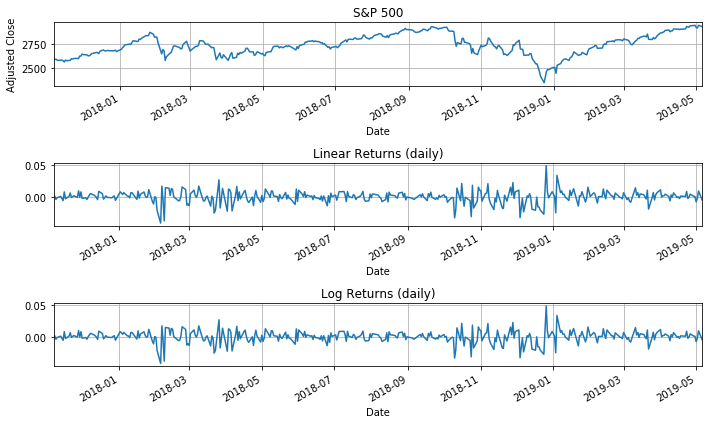

In [14]:
symbol = '^GSPC'

# end date is today
end = datetime.datetime.today().date()

# start date is three years prior
start = end-datetime.timedelta(1.5*365)

# get stock price data
S = data.DataReader(symbol,"yahoo",start,end)['Adj Close']
rlin = (S - S.shift(1))/S.shift(1)
rlog = np.log(S/S.shift(1))

rlin = rlin.dropna()
rlog = rlog.dropna()

# plot data
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
S.plot(title=get_symbol(symbol))
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(3,1,2)
rlin.plot()
plt.title('Linear Returns (daily)')
plt.grid()
plt.tight_layout()

plt.subplot(3,1,3)
rlog.plot()
plt.title('Log Returns (daily)')
plt.grid()
plt.tight_layout()

In [15]:
print('Linear Returns')
mu,sigma = norm.fit(rlin)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(mu,100*252*mu))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigma,100*np.sqrt(252)*sigma))
print()
print('Log Returns')
nu,sigma = norm.fit(rlog)
print('   nu = {0:12.8f}  (annualized = {1:.2f}%)'.format(nu,100*252*nu))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigma,100*np.sqrt(252)*sigma))

Linear Returns
   mu =   0.00037731  (annualized = 9.51%)
sigma =   0.00961646  (annualized = 15.27%)

Log Returns
   nu =   0.00033089  (annualized = 8.34%)
sigma =   0.00963609  (annualized = 15.30%)


In [ ]:
mu = 252*mu
nu = 252*nu
sigma = np.sqrt(252)*sigma

In [9]:
rf = 0.04
mu = 0.08
sigma = 0.3

w = (mu-rf)/sigma**2
nu_opt = rf + (mu-rf)**2/2/sigma/sigma
sigma_opt = np.sqrt(mu-rf)/sigma

print(w,nu_opt,sigma_opt)

0.4444444444444445 0.04888888888888889 0.6666666666666667


## Volatility Pumping

![Kelly_Criterion_Volatility_Pumping](https://github.com/jckantor/CBE40455/blob/master/notebooks/figures/Kelly_Criterion_Volatility_Pumping.png?raw=true)


Expected return = 0.004586


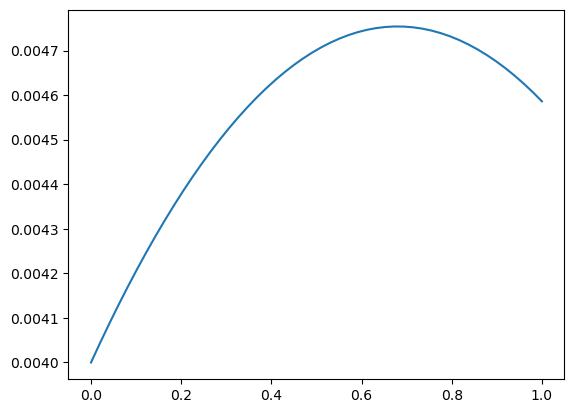

In [19]:
# payoffs for two states
u = 1.059
d = 1/u
p = 0.54

rf = 0.004

K = 100

ElnR = p*np.log(u) + (1-p)*np.log(d)
print("Expected return = {:0.5}".format(ElnR))


Z = np.array([float(random.random() <= p) for _ in range(0,K)])
R = d + (u-d)*Z
S = np.cumprod(np.concatenate(([1],R)))


ElnR = lambda alpha: p*np.log(alpha*u +(1-alpha)*np.exp(rf)) + \
    (1-p)*np.log(alpha*d + (1-alpha)*np.exp(rf))

a = np.linspace(0,1)

plt.plot(a, list(map(ElnR, a)))

0.6799130096484951


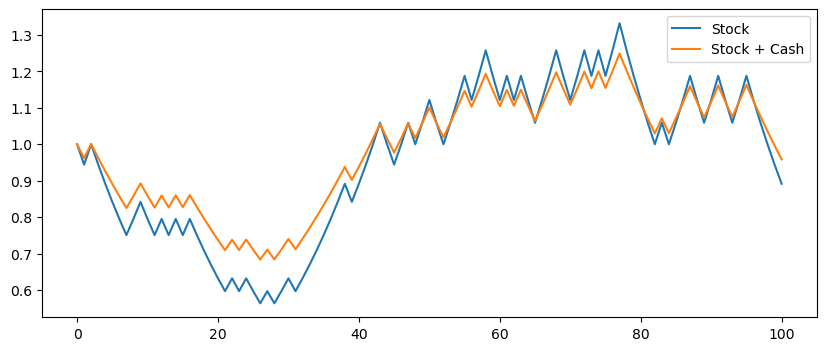

In [22]:
from scipy.optimize import fminbound
alpha = fminbound(lambda alpha: -ElnR(alpha), 0, 1)
print(alpha)

#plt.plot(alpha, ElnR(alpha),'r.',ms=10) 

R = alpha*d + (1-alpha) + alpha*(u-d)*Z
S2 = np.cumprod(np.concatenate(([1],R)))

plt.figure(figsize=(10,4))
plt.plot(range(0,K+1),S,range(0,K+1),S2)
plt.legend(['Stock','Stock + Cash']);